In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
# import function to creat training and test set splits
# from sklearn.cross_validation import train_test_split
# import function to make prediction
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [2]:
# read data from .csv file
# stock = pd.read_csv("./SYF.csv", skiprows = lambda x: x in [i for i in range(1,13)])
stock = pd.read_csv("./SYF.csv")
stock2 = stock.drop([i for i in range(1,13)])
print(len(stock))
print(len(stock2))
close = stock['Close']
high = stock['High']
low = stock['Low']
volume = stock['Volume']
# print(volume)
stock.head()

1113
1101


,Date,Open,High,Low,Close,Adj Close,Volume
0,7/31/14,23.000000,24.000000,22.60,23.00,21.73275,56483900
1,8/1/14,22.900000,23.000000,22.67,23.00,21.73275,6458900
2,8/4/14,23.100000,23.129999,22.90,23.00,21.73275,3455900
3,8/5/14,22.990000,23.010000,22.67,23.00,21.73275,4450200
4,8/6/14,22.799999,22.980000,22.67,22.98,21.71385,6993400


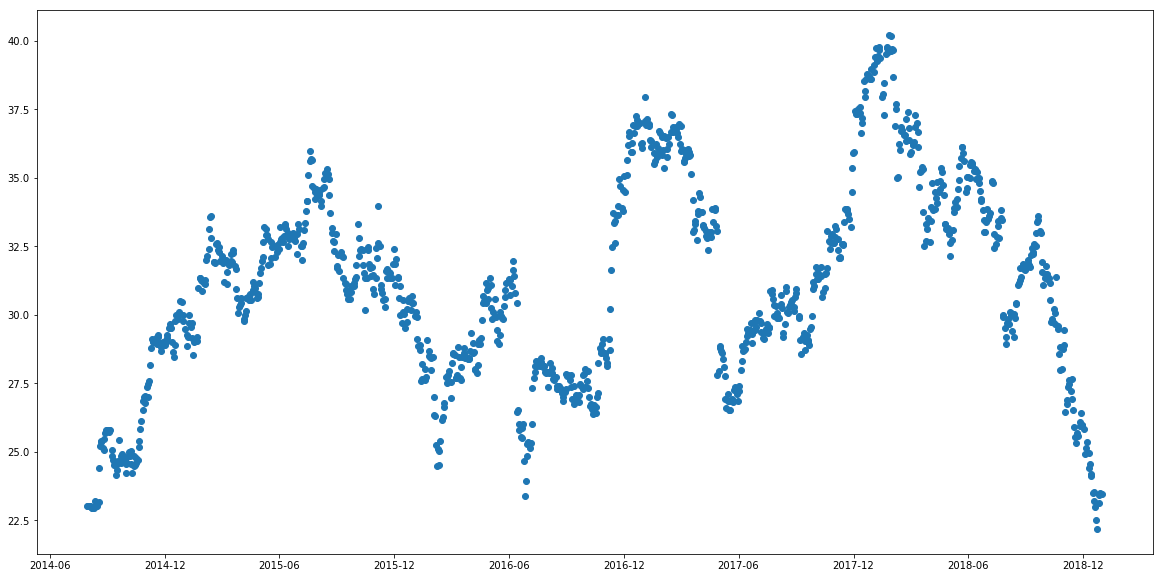

In [234]:
# plot the time-close price graph
time = stock['Date']
time_formatted = []
for index, i in enumerate(time):
    time_formatted.append(datetime.datetime.strptime(i, '%m/%d/%y')) 
dates = matplotlib.dates.date2num(time_formatted)
plt.figure(figsize=(20,10))
plt.plot_date(dates, close)

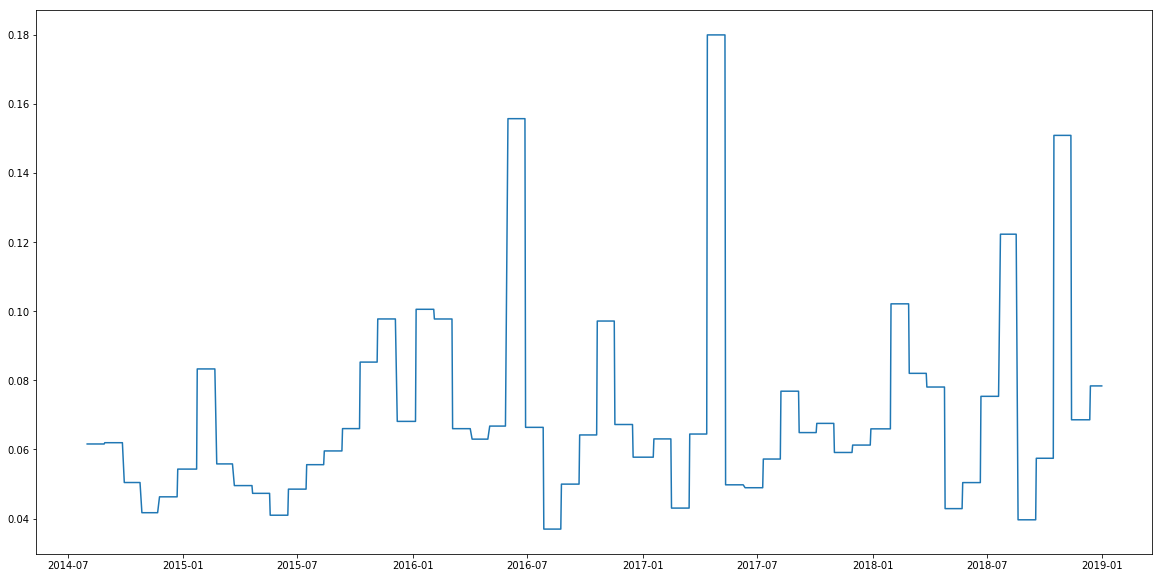

In [235]:
# calculate history volatility
base = [5, 20, 240] # weekly, monthly, annually
r_i = np.zeros((len(stock)-1, 1))
HV = np.zeros((len(stock)-1, len(base)))
HV2 = []
HV3 = []
for i in range(0, len(stock)-1):
    r_i[i] = np.log(close[i+1] / close[i])
for index, i in enumerate(base):
    round = (len(stock)-1)//i
    for j in range(0, round):
        r_tmp = r_i[j*i:(j+1)*i]
        r_std = np.std(r_tmp) * np.sqrt(i)
        if index==1:
            HV2.append(r_std)
        if index==2:
            HV3.append(r_std)
        for k in range(0, i):
            HV[j*i+k][index] = r_std
    r_tmp = r_i[round*i:len(stock)-1]
    r_std = np.std(r_tmp) * np.sqrt(i)
    if index==1:
            HV2.append(r_std)
    if index==2:
            HV3.append(r_std)
    for j in range(0, len(stock)-round*i-1):
        for k in range(round*i, len(stock)-1):
            HV[k][index] = r_std 
plt.figure(figsize=(20,10))
# plt.plot_date(dates, close,'.')
plt.plot_date(dates[1:len(dates)], HV[:,1],'-')
# plt.plot(time, close)

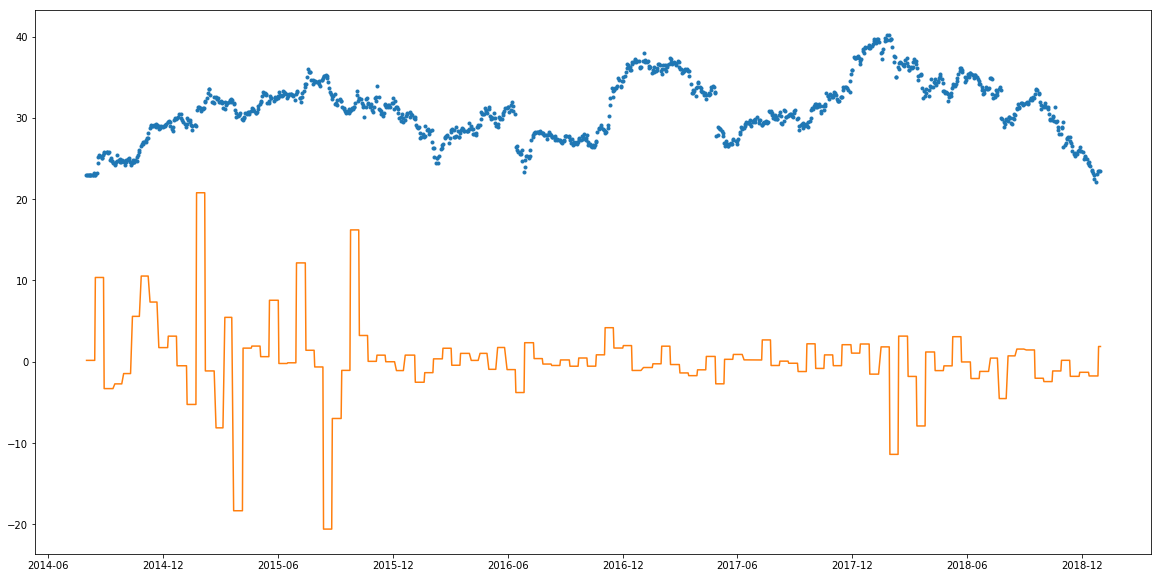

In [236]:
# calculate the ease of movement value(EMV)
#for 1 period of EMV
EMV = np.zeros((len(stock)-1, 1))
for i in range(0, len(stock)-1):
    dis_mov = (high[i+1] + low[i+1])/2 - (high[i] + low[i])/2
    box_ratio = volume[i+1]/100000000/(high[i+1] - low[i+1])
    EMV[i] = dis_mov / box_ratio
#print(EMV)

#for N period of EMV
N = 10
EMV_N = np.zeros((len(stock)-1, 1))
EMV_10 = []
round = (len(stock)-1)//N
for i in range(0, round):
    EMV_tmp = EMV[i*N:(i+1)*N]
    EMV_avg = np.average(EMV_tmp)
    EMV_10.append(EMV_avg)
    for j in range(0, N):
        EMV_N[i*N+j] = EMV_avg
EMV_tmp = EMV[round*N:(len(stock)-1)]
EMV_avg = np.average(EMV_tmp)
for i in range(round*N, len(stock)-1):
    EMV_N[i] = EMV_avg
# print(EMV_N)
plt.figure(figsize=(20,10))
plt.plot_date(dates, close,'.')
plt.plot_date(dates[1:len(dates)], EMV_N,'-')

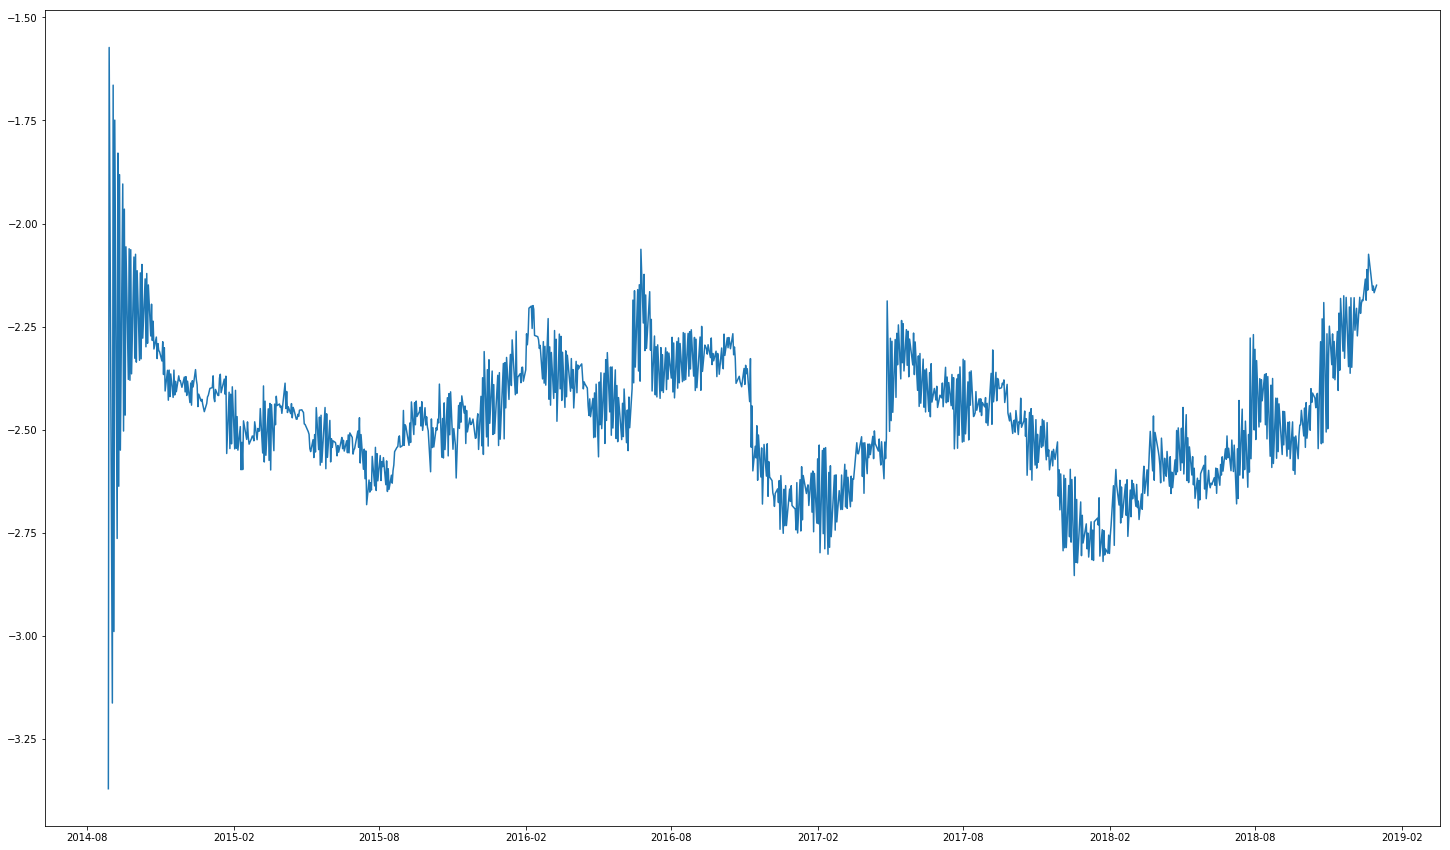

In [237]:
# calculate the exponential moving average(EMA)
base = [10, 30] # short and long period
EMA_N = np.zeros((len(stock), len(base)))
for index,i in enumerate(base):
    multiplier = 2 / (1 + i)
    round = (len(stock)-1)//i
    tmp = close[0:i]
    EMA_N[0][index] = np.average(tmp)
    for j in range(1, len(stock)):
        EMA_N[j][index] = (close[j]-EMA_N[j-1][index]) * multiplier / EMA_N[j-1][index]
plt.figure(figsize=(25,15))
# plt.plot_date(dates[1:len(dates)], close[1:len(dates)],'.')
plt.plot_date(dates[base[0]*2:len(dates)], EMA_N[base[0]*2:len(stock),0],'-')

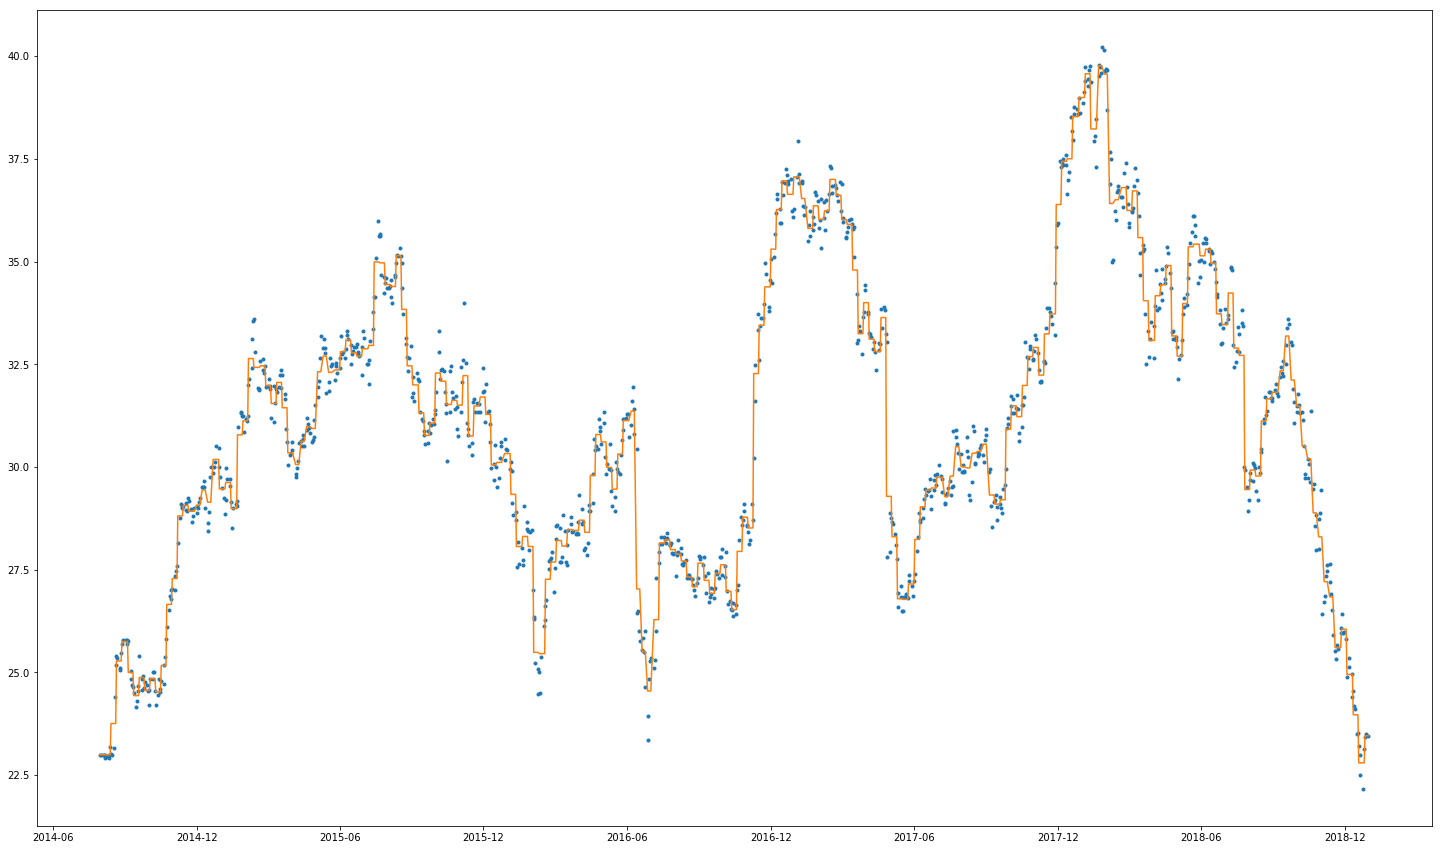

In [239]:
#calcualte the moving average(MA)
base = [5, 30]
MA_N = np.zeros((len(stock), len(base)))
MA1 = []
MA2 = []
for index,i in enumerate(base):
    round = len(stock)//i
    for j in range(0,round):
        tmp = close[j*i:(j+1)*i]
        if index==0:
            MA1.append(np.average(tmp))
        if index==1:
            MA2.append(np.average(tmp))     
        for k in range(0,i):
            MA_N[j*i+k][index] = np.average(tmp)
    tmp = close[round*i:len(stock)]
    if index==0:
            MA1.append(np.average(tmp))
    if index==1:
            MA2.append(np.average(tmp))  
    for j in range(round*i, len(stock)):
        MA_N[j][index] = np.average(tmp)
# print(MA_N[:,0])
plt.figure(figsize=(25,15))
plt.plot_date(dates, close,'.')
plt.plot_date(dates, MA_N[:,0],'-')

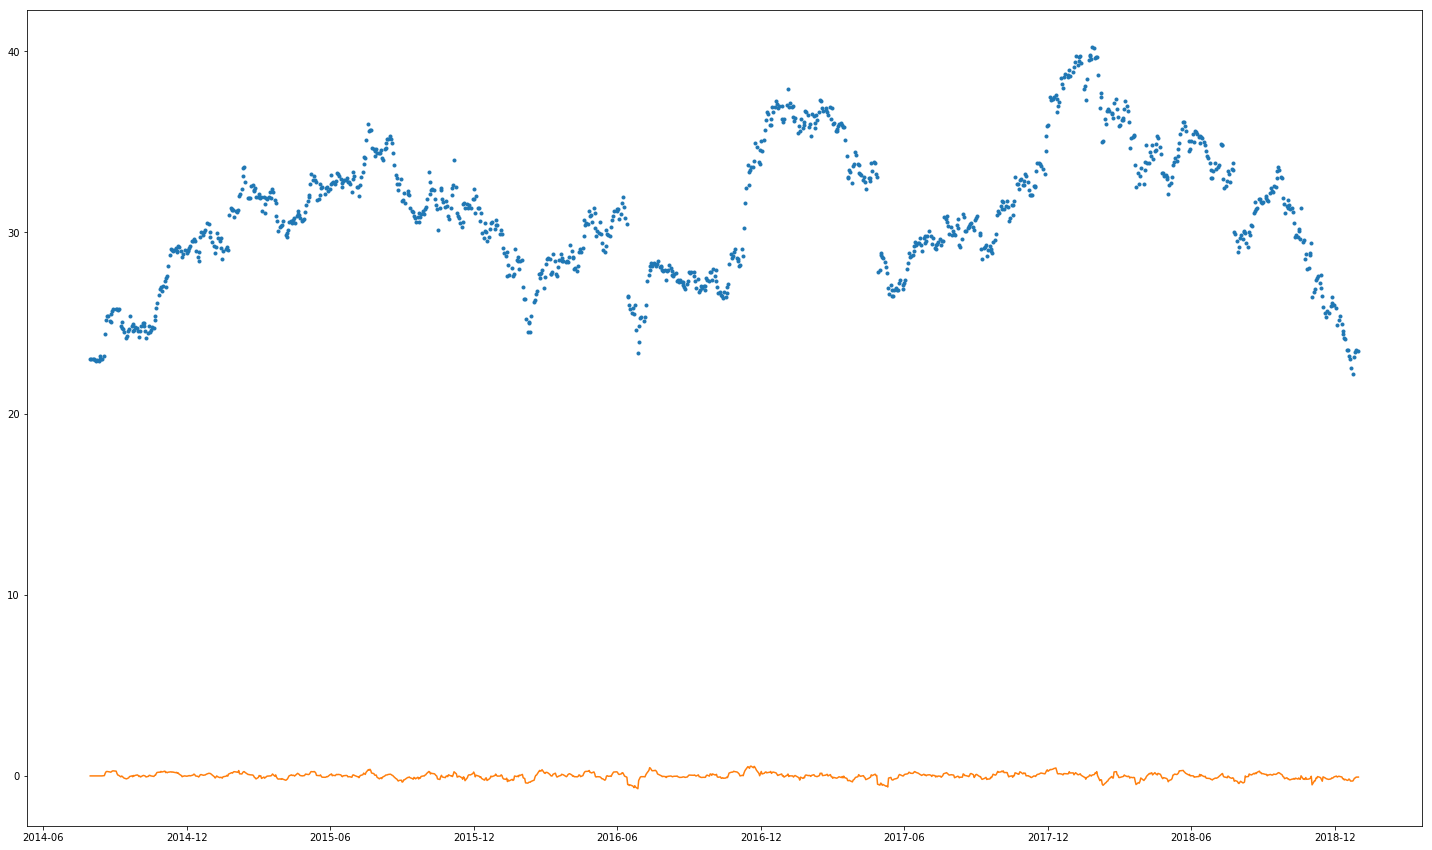

In [240]:
#calculate the MTM
N = 10 
MTM_N = np.zeros((len(stock), 1))
for i in range(N, len(stock)):
    MTM_N[i] = (close[i]-close[i-N])/N
plt.figure(figsize=(25,15))
plt.plot_date(dates, close,'.')
plt.plot_date(dates, MTM_N[:,0],'-')

In [241]:
# form input vector set for neural network
num_var = 10
input_vect = np.zeros((len(stock), num_var))
for i in range(0, len(stock)-1):
    input_vect[i+1][0] = HV[i][0]
    input_vect[i+1][1] = HV[i][1]
    input_vect[i+1][2] = HV[i][2]
    input_vect[i+1][3] = EMV[i]
    input_vect[i+1][4] = EMV_N[i]
    input_vect[i][5] = EMA_N[i][0]
    input_vect[i][6] = EMA_N[i][1]
    input_vect[i][7] = MA_N[i][0]
    input_vect[i][8] = MA_N[i][1]
    input_vect[i][9] = MTM_N[i]
    
input_vect[len(stock)-1][5] = EMA_N[len(stock)-1][0]
input_vect[len(stock)-1][6] = EMA_N[len(stock)-1][1]
input_vect[len(stock)-1][7] = MA_N[len(stock)-1][0]
input_vect[len(stock)-1][8] = MA_N[len(stock)-1][1]
input_vect[len(stock)-1][9] = MTM_N[len(stock)-1]

In [10]:
#apply neural network by tensorflow
#build the simple version neural network, which has three layers
#optimization variables
learning_rate = 0.5
epochs = 10
batch_size = 10
#input
x = tf.placeholder(tf.float32, [None, num_var])
#output
y = tf.placeholder(tf.float32, [None, 1])

In [11]:
#nodes in the hidden layer
node = 5
#the weights connecting the input to the hidden layer
W1 = tf.Variable(tf.random_normal([num_var, node], stddev=0.03), name='W1')
b1 = tf.Variable(tf.random_normal([node]), name='b1')
#the weights connecting the hidden layer to the output
W2 = tf.Variable(tf.random_normal([node, 1], stddev=0.03), name='W2')
b2 = tf.Variable(tf.random_normal([1]), name='b2')

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
#calculate the output of the hidden layer 
hidden_out = tf.add(tf.matmul(x,W1), b1)
hidden_out = tf.nn.relu(hidden_out)
# hidden_out = tf.nn.sigmoid(hidden_out)

In [13]:
#calculate the hidden layer output 
# y_ = tf.nn.softmax(tf.add(tf.matmul(hidden_out,W2), b2))
# y_ = tf.nn.sigmoid(tf.add(tf.matmul(hidden_out,W2), b2))
# y_ = tf.reciprocal(1 + tf.exp(-y_))
y_ = tf.nn.relu(tf.add(tf.matmul(hidden_out,W2), b2))

In [14]:
# cost function 
y_clipped = tf.clip_by_value(y_, 1e-10, 0.9999999)
cost_entropy = -tf.reduce_mean(tf.reduce_sum(y * tf.log(y_clipped)
                         + (1 - y) * tf.log(1 - y_clipped), axis=1))
# cost_entropy = tf.reduce_mean(tf.squared_difference(y_, y))

# add an optimiser
# optimiser = tf.train.AdamOptimizer(0.1).minimize(cross_entropy)
optimiser = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost_entropy)

# Cost function
# mse = tf.reduce_mean(tf.squared_difference(out, Y))

Instructions for updating:
Use tf.cast instead.


In [15]:
#set up the initialization operator
init_op = tf.global_variables_initializer()

# define an accuracy assessment operation
# correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
# correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1)
correct_prediction = tf.equal(y, y_)
prediction = tf.argmax(y_)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [259]:
#split the trian test part
train = input_vect[10:int(len(input_vect)*0.8)]
train_label = np.array(close[10:int(len(input_vect)*0.8)])
train_label = train_label.reshape((len(train_label),1))
test = input_vect[int(len(input_vect)*0.8):len(input_vect)]
test_label = np.array(close[int(len(input_vect)*0.8):len(input_vect)])
test_label = test_label.reshape((len(test_label), 1))

In [17]:
scaler = MinMaxScaler()
train = scaler.fit(train).transform(train)
train_label = scaler.fit(train_label).transform(train_label)
test = scaler.fit(test).transform(test)
test_label = scaler.fit(test_label).transform(test_label)

In [18]:
#Start the tensor flow session
with tf.Session() as sess:
#     initialize the variables
    sess.run(init_op)
    total_batch = len(train)//batch_size
    for epoch in range(epochs):
        avg_cost = 0
        for i in range(total_batch):
            batch_x = train[batch_size*i:batch_size*(i+1)]
            batch_y = train_label[batch_size*i:batch_size*(i+1)]
            _, c = sess.run([optimiser, cost_entropy], feed_dict={x: batch_x, y: batch_y})
            avg_cost += c
        avg_cost /= total_batch 
        print("Epoch:", (epoch+1), "cost =", "{:.3f}".format(avg_cost))
    test_x = test
    test_y = test_label
#     print(sess.run(prediction, feed_dict={x:test_x, y:test_y}))
    print(sess.run(accuracy , feed_dict={x:test_x, y:test_y}))
    
# print(test_y)
sess.close()

Epoch: 1 cost = 10.534
Epoch: 2 cost = 10.553
Epoch: 3 cost = 10.553
Epoch: 4 cost = 10.553
Epoch: 5 cost = 10.553
Epoch: 6 cost = 10.553
Epoch: 7 cost = 10.553
Epoch: 8 cost = 10.553
Epoch: 9 cost = 10.553
Epoch: 10 cost = 10.553
0.004484305


In [242]:
#Placeholder
X = tf.placeholder(tf.float32, shape=[None, num_var])
Y = tf.placeholder(tf.float32, shape=[None,1])

In [243]:
# Initializers
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()

In [244]:
n_neurons_1 = 50
n_neurons_2 = 25
n_target = 1

#Layer 1
W_hidden_1 = tf.Variable(weight_initializer([num_var, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))

#Layer 2
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))

#Output Layer
W_out = tf.Variable(weight_initializer([n_neurons_2, n_target]))
bias_out = tf.Variable(bias_initializer([n_target]))

In [245]:
# Hidden layer
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))

# Output layer (must be transposed)
out = tf.transpose(tf.add(tf.matmul(hidden_2, W_out), bias_out))


In [246]:
# Cost function
mse = tf.reduce_mean(tf.squared_difference(out, Y))
# Optimizer
opt = tf.train.AdamOptimizer().minimize(mse)

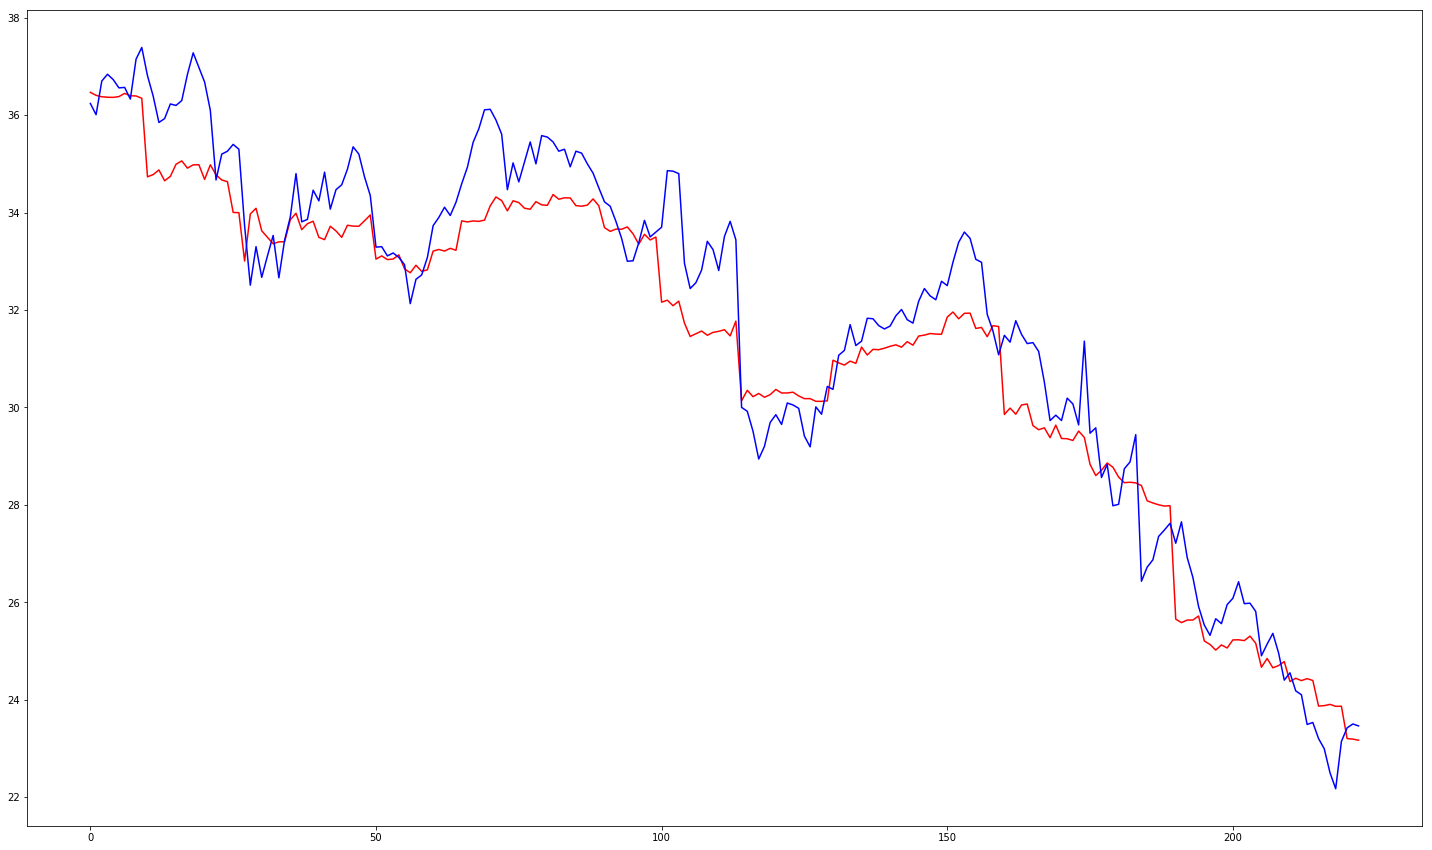

In [264]:
X_test = test
y_test = test_label

# Make Session
net = tf.Session()
# Run initializer
net.run(tf.global_variables_initializer())

# Setup interactive plot
# plt.ion()
# fig = plt.figure()
# ax1 = fig.add_subplot(111)
# line1, = ax1.plot(y_test)
# line2, = ax1.plot(y_test*0.5)
# plt.show()

# Number of epochs and batch size
epochs = 10
batch_size = 75

X_train = train
y_train = train_label

for e in range(epochs):

    # Shuffle training data
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    # Minibatch training
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        # Run optimizer with batch
        net.run(opt, feed_dict={X: batch_x, Y: batch_y})

# Print final MSE after Training
mse_final = net.run(mse, feed_dict={X: X_test, Y: y_test})
# print(mse_final)
result = net.run(out, feed_dict={X: X_test, Y: y_test})
result = result.transpose()
# result = result.reshape((len(result), 1))
# print(result.shape)
# print(y_test)
plt.figure(figsize=(25,15))
plt.plot(result,'r')
plt.plot(y_test,'b')
plt.show()

In [248]:
true = [24.27, 24.09, 25.24, 25.37, 25.42, 25.99, 25.75, 26.02,
       25.85, 25.77, 26.38, 26.35, 26.28, 26.55, 29.4, 29.81, 29.79,
       29.98, 29.65, 30.07, 30.04, 29.69, 29.72, 29.99, 30.11, 30.11,
       29.94, 30.37, 30.44, 30.77, 30.83, 31.75]

In [270]:
#HV * 3
#EMV
#EMV_N
#EMA_N * 2
#MA * 2
#MTM * N

#make prediction of HV, EMV, EMV_N, EMA_N, MA, MTM using non-linear regression
base = [5, 20, 240] # weekly, monthly, annually
HV_pred = np.zeros((len(true),len(base)))
#for base = 5 (weekly)
HV_tmp = list(HV[-10:,0])
for i in range(0,len(true)):
    HV_new = np.average(HV_tmp)
#     HV_pred[i][0] = HV_new
    HV_pred[i][0] = HV_tmp[0]
    HV_tmp = HV_tmp[-9:]
#     HV_tmp.append(HV_new)
    HV_tmp.append(HV_tmp[0])
#for base = 20 (monthly)
HV_tmp = HV2[-12:]
for i in range(0,12):
    HV_pred[i][1] = np.average(HV_tmp)
    HV_tmp.append(np.average(HV_tmp))
    HV_tmp = HV_tmp[-12:]
for i in range(12, len(true)):
    HV_pred[i][1] = np.average(HV_tmp)
#for base=240 (yearly)
for i in range(0, len(true)):
    HV_pred[i][2] = np.average(HV3)

In [277]:
#for EMV
EMV_pred = np.zeros((len(true), 1))
EMV_tmp = list(EMV[-10:,0])
for i in range(0, len(true)):
#     EMV_new = np.average(EMV_tmp)
#     EMV_pred[i][0] = EMV_new
    EMV_pred[i][0] = EMV_tmp[0]
    EMV_tmp = EMV_tmp[-9:]
    EMV_tmp.append(EMV_tmp[0])
#for EMV_N
EMV_N_pred = np.zeros((len(true), 1))
EMV_N_tmp = EMV_10[-10:]
for i in range(0,3):
#     EMV_N_new = np.average(EMV_N_tmp)
    EMV_N_new = np.average(EMV_N_tmp[0])
    for j in range(0, 10):
        EMV_N_pred[i*10+j] = EMV_N_new
    EMV_N_tmp.append(EMV_N_new)
    EMV_N_tmp = EMV_N_tmp[-10:]
EMV_N_pred[30] = EMV_N_pred[29]
EMV_N_pred[31] = EMV_N_pred[30] 

In [280]:
#for EMA_1
EMA_pred = np.zeros((len(true), 2))
EMA_tmp = list(EMA_N[-300:,0])
for i in range(0, len(true)):
#     EMA_new = np.average(EMA_tmp)
    EMA_new = EMA_tmp[0]
    EMA_pred[i][0] = EMA_new
    EMA_tmp.append(EMA_new)
    EMA_tmp = EMA_tmp[-300:]
#for EMA_2   
EMA_tmp = list(EMA_N[-300:,1])
for i in range(0, len(true)):
    EMA_tmp = list(EMA_tmp)
#     EMA_new = np.average(EMA_tmp)
    EMA_new = EMA_tmp[0]
    EMA_pred[i][1] = EMA_new
    EMA_tmp.append(EMA_new)
    EMA_tmp = EMA_tmp[-300:]

In [324]:
#for MA
MA_pred = np.zeros((len(true), 2))
MA1_tmp = MA1[-5:]
MA2_tmp = MA2[-10:]
for i in range(0, len(true)//5):
#     MA_new = np.average(MA1_tmp)
    MA_new = MA1_tmp[0]
    for j in range(0, 5):
        MA_pred[j+i*5][0] = MA_new
    MA1_tmp.append(MA_new)
    MA1_tmp = MA1_tmp[-5:]
MA_pred[30][0] = MA_pred[29][0]
MA_pred[31][0] = MA_pred[29][0]

MA_new = MA2_tmp[0]
for j in range(0, len(true)):
    MA_pred[j][1] = MA_new

In [312]:
#for MTM
MTM_pred = np.zeros((len(true), 1))
MTM_tmp = list(MTM_N[-30:])
for i in range(0, len(true)):
#     MTM_new = np.average(MTM_tmp)
    MTM_new = MTM_tmp[0]
    MTM_pred[i] = MTM_new
    MTM_tmp.append(MTM_new)
    MTM_tmp = MTM_tmp[-15:]

In [325]:
# form input vector set for neural network
num_var = 10
test_vect = np.zeros((len(true), num_var))
for i in range(0, len(true)):
    test_vect[i][0] = HV_pred[i][0]
    test_vect[i][1] = HV_pred[i][1]
    test_vect[i][2] = HV_pred[i][2]
    test_vect[i][3] = EMV_pred[i]
    test_vect[i][4] = EMV_N_pred[i]
    test_vect[i][5] = EMA_pred[i][0]
    test_vect[i][6] = EMA_pred[i][1]
    test_vect[i][7] = MA_pred[i][0]
    test_vect[i][8] = MA_pred[i][1]
    test_vect[i][9] = MTM_pred[i]

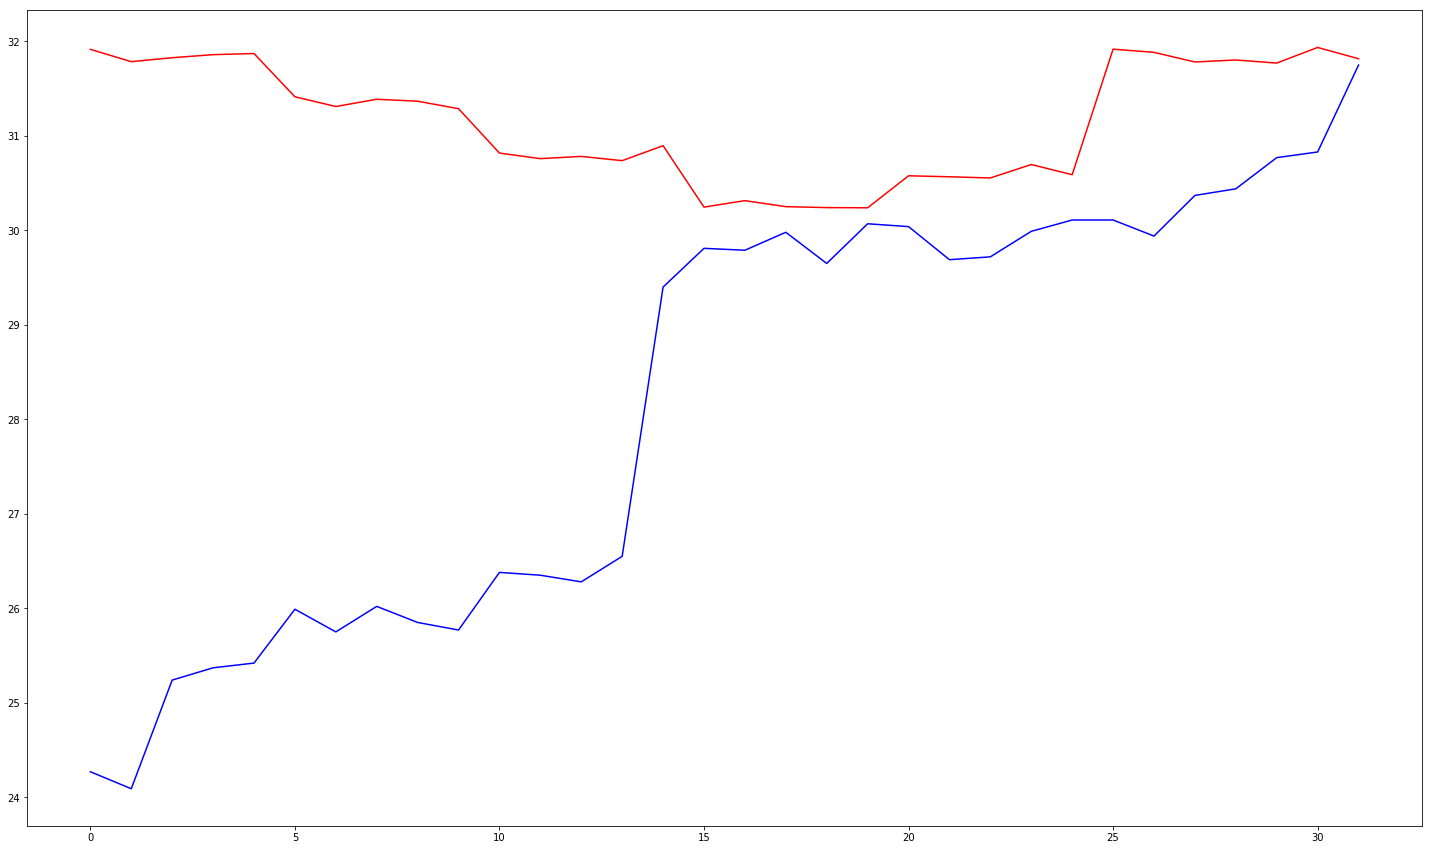

In [327]:
# print(mse_final)
pred = net.run(out, feed_dict={X: test_vect})
pred = pred.transpose()
plt.figure(figsize=(25,15))
plt.plot(pred,'r')
plt.plot(true,'b')
plt.show()

In [328]:
print(pred)

[[31.916304]
 [31.785925]
 [31.82779 ]
 [31.860044]
 [31.872171]
 [31.41411 ]
 [31.311075]
 [31.387882]
 [31.367462]
 [31.287857]
 [30.81845 ]
 [30.759483]
 [30.783155]
 [30.73811 ]
 [30.896572]
 [30.246433]
 [30.31506 ]
 [30.251202]
 [30.241165]
 [30.239119]
 [30.577879]
 [30.567474]
 [30.555008]
 [30.69719 ]
 [30.589376]
 [31.918291]
 [31.88442 ]
 [31.7828  ]
 [31.80349 ]
 [31.771116]
 [31.936237]
 [31.817068]]
